# Анализ картографических данных и прогнозирование доминирующего вида лесного покрова

Получаем набор данных c https://www.kaggle.com/uciml/forest-cover-type-dataset, содержащий информацию о лесном покрове в четырех областях Roosevelt National Forest in Colorado (национальный лес, расположенный с северной части штата Колорадо, США)

Местность поделена на квадраты размером 30x30 метров и каждый характеризуется следующими параметрами:

    Elevation = Высота над уровнем моря (целое число)

    Aspect = Аспект в градусах по азимуту (целое число)

    Slope = Уклон в градусах (целое число)

    Horizontal_Distance_To_Hydrology = Горизонтальное расстояние до ближайших водных объектов (целое число)

    Vertical_Distance_To_Hydrology = Вертикальное расстояние до ближайших водных объектов (целое число)

    Horizontal_Distance_To_Roadways = Горизонтальное расстояние до ближайшей проезжей части (целое число).

    Hillshade_9am = Индекс тени холма в 9 часов утра, в день летнего солнцестояния (целое число 0..255)

    Hillshade_Noon = Индекс тени холма в полдень, в день летнего солнцестояния (целое число 0..255)

    Hillshade_3pm = Индекс тени холма в 3 часа дня, в день летнего солнцестояния (целое число 0..255)

    Horizontal_Distance_To_Fire_Point = Расстояние по горизонтали до ближайших точек возгорания пожаров (целое число)

    Wilderness_Area1 = Принадлежность Rawah Wilderness Area (целое число: 1 - принадлежит, 0 - нет)

    Wilderness_Area2 = Принадлежность Neota Wilderness Area (целое число: 1 - принадлежит, 0 - нет)

    Wilderness_Area3 = Принадлежность Comanche Peak Wilderness Area (целое число: 1 - принадлежит, 0 - нет)

    Wilderness_Area4 = Принадлежность Cache la Poudre Wilderness Area (целое число: 1 - принадлежит, 0 - нет)

    Soil_Type1, Soil_Type2, ... , Soil_Type40 = тип почвы на квадрате (целое число: 1 - принадлежит, 0 - нет)

Последний параметр квадрата - Cover_Type, характеризующий доминирующий вид лесного покрова на квадрате. Задается целым числом от 1 до 7:
    
    1) Пихтовый лес
    2) Сосна скрученная
    3) Сосна жёлтая
    4) Тополь/Ива
    5) Осина
    6) Дугласова пихта
    7) Криволесье

Всего признаков - 55

## Ход решения

Импортируем необходимые модули

In [17]:
import pandas as pd
import numpy as np
import time
from math import fabs
import matplotlib.pyplot as pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Импортируем данные с локального хранилища

In [18]:
data = pd.read_csv('covtype.csv')
print('Количество признаков:', len(data.columns))
print('Количество объектов:', len(data))

Количество признаков: 55
Количество объектов: 581012


Проверим содержание и сгенерируем описательную статистику полученных данных:

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [20]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


Выводы:
   
    1) Пропусков в данных не выявлено

    2) Данные не нормализованы, что может стать помехой для некоторых алгоритмов

In [21]:
# import seaborn as sb
# import warnings
# warnings.filterwarnings('ignore')
# for index, col in enumerate(data.loc[:, :'Horizontal_Distance_To_Fire_Points']):
#     pyplot.figure(index)
#     sb.distplot(data[col])

Для начала уменьшим размерность.
Каждая запись в наборе данных имеет 40 столбцов для обозначения типа почвы. Более оптимальный вариант хранения - использовать один столбец, содержащий номер доминирующего вида почвы в виде дискретной целой величины, принимающей значения от 1 до 40:

In [22]:
optimized_data = data.drop(data.loc[:, 'Soil_Type1' : 'Soil_Type40'], axis = 1)
union_soil_data = pd.Series([0 for _ in range(len(data))])
for index, col in enumerate(data.loc[:, 'Soil_Type1' : 'Soil_Type40']):
    for item in np.where(data[col].values == 1):
        union_soil_data[item] = index + 1
optimized_data['Soil_Type'] = union_soil_data

Таким же образом поступим с Wilderness_Area1, Wilderness_Area2, Wilderness_Area3 и Wilderness_Area4:

In [23]:
optimized_data = optimized_data.drop(optimized_data.loc[:, 'Wilderness_Area1' : 'Wilderness_Area4'], axis = 1)
union_wilderness_data = pd.Series([0 for _ in range(len(data))])
for index, col in enumerate(data.loc[:, 'Wilderness_Area1' : 'Wilderness_Area4']):
    for item in np.where(data[col].values == 1):
        union_wilderness_data[item] = index + 1
optimized_data['Wilderness'] = union_wilderness_data

Расстоние до источников воды также лучше мерить одним значением:

In [24]:
from math import sqrt
optimized_data = optimized_data.drop(optimized_data.loc[:, 'Horizontal_Distance_To_Hydrology' : 'Vertical_Distance_To_Hydrology'], axis = 1)
union_distance_data = pd.Series([0 for _ in range(len(data))])
for index in range(len(data)):
    horizontal = data['Horizontal_Distance_To_Hydrology'][index]
    vertical = data['Vertical_Distance_To_Hydrology'][index]
    union_distance_data[index] = sqrt(horizontal**2 + vertical**2)
optimized_data['Distance_To_Hydrology'] = union_distance_data

In [25]:
optimized_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 12 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Roadways     581012 non-null  int64
 4   Hillshade_9am                       581012 non-null  int64
 5   Hillshade_Noon                      581012 non-null  int64
 6   Hillshade_3pm                       581012 non-null  int64
 7   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 8   Cover_Type                          581012 non-null  int64
 9   Soil_Type                           581012 non-null  int64
 10  Wilderness                          581012 non-null  int64
 11  Distance_To_Hydrology               581012 non-null 

In [26]:
optimized_data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness,Distance_To_Hydrology
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,2350.146611,212.146049,223.318716,142.528263,1980.291226,2.051471,24.362443,2.114462,275.659184
std,279.984734,111.913721,7.488242,1559.254870,26.769889,19.768697,38.274529,1324.195210,1.396504,9.485405,1.061295,216.989552
min,1859.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,2809.000000,58.000000,9.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,1.000000,20.000000,1.000000,108.000000
50%,2996.000000,127.000000,13.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,2.000000,29.000000,2.000000,229.000000
75%,3163.000000,260.000000,18.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,2.000000,31.000000,3.000000,393.000000
max,3858.000000,360.000000,66.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,7.000000,40.000000,4.000000,1418.000000


Таким образом удалось уменьшить размерность с 54 признаков до 11

Осталось нормализовать данные

In [45]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
optimized_normalized_data = optimized_data
t = mm_scaler.fit_transform(optimized_data[['Elevation', 'Aspect', 'Slope', 'Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Soil_Type', 'Wilderness']])
optimized_normalized_data[['Elevation', 'Aspect', 'Slope', 'Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Soil_Type', 'Wilderness']] = t

In [46]:
optimized_normalized_data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness,Distance_To_Hydrology
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,0.550458,0.432380,0.213692,0.330216,0.835221,0.879208,0.561135,0.276076,2.051471,0.599037,0.371487,0.194400
std,0.140062,0.310871,0.113458,0.219089,0.105393,0.077830,0.150687,0.184608,1.396504,0.243216,0.353765,0.153025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.475238,0.161111,0.136364,0.155403,0.779528,0.838583,0.468504,0.142758,1.000000,0.487179,0.000000,0.076164
50%,0.568784,0.352778,0.196970,0.280596,0.858268,0.889764,0.562992,0.238394,2.000000,0.717949,0.333333,0.161495
75%,0.652326,0.722222,0.272727,0.467613,0.909449,0.933071,0.661417,0.355500,2.000000,0.769231,0.666667,0.277151
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000


In [47]:
# t = optimized_normalized_data.loc[:, 'Elevation' : 'Slope']
# t['Distance_To_Hydrology'] = optimized_normalized_data['Distance_To_Hydrology']
# t['Horizontal_Distance_To_Roadways'] = optimized_normalized_data['Horizontal_Distance_To_Roadways']
# t['Hillshade_9am'] = optimized_normalized_data['Hillshade_9am']
# t['Hillshade_Noon'] = optimized_normalized_data['Hillshade_Noon']
# t['Hillshade_3pm'] = optimized_normalized_data['Hillshade_3pm']
# t['Horizontal_Distance_To_Fire_Points'] = optimized_normalized_data['Horizontal_Distance_To_Fire_Points']
# t['Wilderness'] = optimized_normalized_data['Wilderness']
# t['Soil_Type'] = optimized_normalized_data['Soil_Type']
# t['Cover_Type'] = optimized_normalized_data['Cover_Type']
# optimized_normalized_data = t
# optimized_normalized_data.describe()

,Elevation,Aspect,Slope,Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness,Soil_Type,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,0.550458,0.432380,0.213692,0.194400,0.330216,0.835221,0.879208,0.561135,0.276076,0.371487,0.599037,2.051471
std,0.140062,0.310871,0.113458,0.153025,0.219089,0.105393,0.077830,0.150687,0.184608,0.353765,0.243216,1.396504
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.475238,0.161111,0.136364,0.076164,0.155403,0.779528,0.838583,0.468504,0.142758,0.000000,0.487179,1.000000
50%,0.568784,0.352778,0.196970,0.161495,0.280596,0.858268,0.889764,0.562992,0.238394,0.333333,0.717949,2.000000
75%,0.652326,0.722222,0.272727,0.277151,0.467613,0.909449,0.933071,0.661417,0.355500,0.666667,0.769231,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [62]:
# optimized_normalized_data['Soil_Type'] = optimized_normalized_data['Soil_Type'].astype('category')
# optimized_normalized_data['Wilderness'] = optimized_normalized_data['Wilderness'].astype('category')
# optimized_normalized_data['Cover_Type'] = optimized_normalized_data['Cover_Type'].astype('category')

In [63]:
# optimized_normalized_data.describe()

,Elevation,Aspect,Slope,Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,0.550458,0.432380,0.213692,0.194400,0.330216,0.835221,0.879208,0.276076
std,0.140062,0.310871,0.113458,0.153025,0.219089,0.105393,0.077830,0.184608
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.475238,0.161111,0.136364,0.076164,0.155403,0.779528,0.838583,0.142758
50%,0.568784,0.352778,0.196970,0.161495,0.280596,0.858268,0.889764,0.238394
75%,0.652326,0.722222,0.272727,0.277151,0.467613,0.909449,0.933071,0.355500
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Применим метод главных компонент:

Elevation  ->  0.359233205783563
Aspect  ->  0.24161117635776452
Slope  ->  0.13196496267661323
Distance_To_Hydrology  ->  0.07775059878236583
Horizontal_Distance_To_Roadways  ->  0.05467847786153061
Hillshade_9am  ->  0.04508788960875243
Hillshade_Noon  ->  0.03840265490564876
Hillshade_3pm  ->  0.029472342144870285
Horizontal_Distance_To_Fire_Points  ->  0.01484988590272344
Wilderness  ->  0.006852414718734678
Soil_Type  ->  9.639125743315653e-05


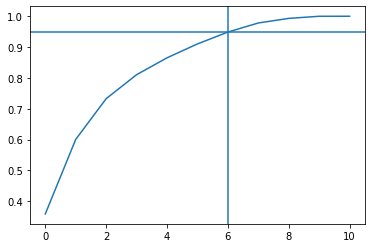

In [49]:
from sklearn.decomposition import PCA
X = optimized_normalized_data.drop(['Cover_Type'], axis=1)
pca = PCA(n_components=len(X.columns))
pca.fit_transform(X)
for index, ratio in enumerate(pca.explained_variance_ratio_):
    print(X.columns[index], ' -> ', ratio)
    
pyplot.grid(True)
pyplot.plot(np.cumsum(pca.explained_variance_ratio_))
pyplot.axhline(0.98)
pyplot.axvline(8)

6 компонент достаточно для описания 95% данных.

Проверим коэффициенты асимметрии:

Elevation                            -0.817596
Aspect                                0.402628
Slope                                 0.789273
Distance_To_Hydrology                 1.134374
Horizontal_Distance_To_Roadways       0.713679
Hillshade_9am                        -1.181147
Hillshade_Noon                       -1.063056
Hillshade_3pm                        -0.277053
Horizontal_Distance_To_Fire_Points    1.288644
Wilderness                            0.090308
Soil_Type                            -0.704271
Cover_Type                            2.276574
dtype: float64

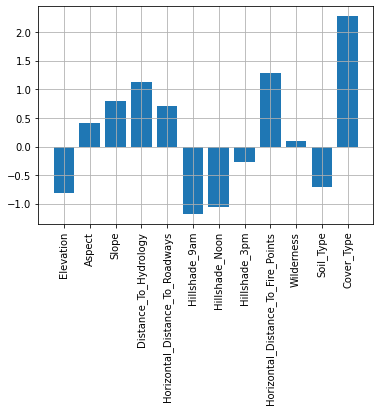

In [50]:
pyplot.grid(True)
pyplot.xticks(rotation='vertical')
pyplot.bar(optimized_normalized_data.columns, optimized_normalized_data.skew())
optimized_normalized_data.skew()

Проверим корреляции:

In [51]:
optimized_normalized_data.corr()

,Elevation,Aspect,Slope,Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness,Soil_Type,Cover_Type
Elevation,1.000000,0.015735,-0.242697,0.298104,0.365559,0.112179,0.205887,0.059148,0.148022,-0.315590,0.689848,-0.269554
Aspect,0.015735,1.000000,0.078728,0.021103,0.025121,-0.579273,0.336103,0.646944,-0.109172,0.138703,0.007149,0.017080
Slope,-0.242697,0.078728,1.000000,0.009080,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662,0.286178,-0.105571,0.148285
Distance_To_Hydrology,0.298104,0.021103,0.009080,1.000000,0.064328,-0.037391,0.036988,0.052163,0.044679,0.065913,0.190041,-0.014289
Horizontal_Distance_To_Roadways,0.365559,0.025121,-0.215914,0.064328,1.000000,0.034349,0.189461,0.106119,0.331580,-0.445922,0.240829,-0.153450
Hillshade_9am,0.112179,-0.579273,-0.327199,-0.037391,0.034349,1.000000,0.010037,-0.780296,0.132669,-0.233455,0.040877,-0.035415
Hillshade_Noon,0.205887,0.336103,-0.526911,0.036988,0.189461,0.010037,1.000000,0.594274,0.057329,-0.080767,0.013662,-0.096426
Hillshade_3pm,0.059148,0.646944,-0.175854,0.052163,0.106119,-0.780296,0.594274,1.000000,-0.047981,0.105050,-0.001122,-0.048290
Horizontal_Distance_To_Fire_Points,0.148022,-0.109172,-0.185662,0.044679,0.331580,0.132669,0.057329,-0.047981,1.000000,-0.416830,0.100952,-0.108936
Wilderness,-0.315590,0.138703,0.286178,0.065913,-0.445922,-0.233455,-0.080767,0.105050,-0.416830,1.000000,-0.271883,0.275464


Наибольшие коэффициенты корреляции:

Hillshade_9am ~ Hillshade_3pm (-0.780296)

Elevation ~ Soil_Type (0.689848)

Aspect ~ Hillshade_3pm (0.646944)

Можно исключить Hillshade_3pm:

In [52]:
optimized_normalized_data = optimized_normalized_data.drop(['Hillshade_3pm'], axis=1)

Прогоним PCA еще раз:

Elevation  ->  0.37574136296920546
Aspect  ->  0.2292176467771582
Slope  ->  0.13849085834994326
Distance_To_Hydrology  ->  0.08120188759474131
Horizontal_Distance_To_Roadways  ->  0.05752546562699576
Hillshade_9am  ->  0.04730520453689402
Hillshade_Noon  ->  0.03569480941935928
Horizontal_Distance_To_Fire_Points  ->  0.015682365289429335
Wilderness  ->  0.012745741603011167
Soil_Type  ->  0.006394657833262189


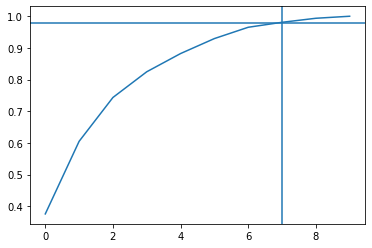

In [64]:
from sklearn.decomposition import PCA
X = optimized_normalized_data.drop(['Cover_Type'], axis=1)
pca = PCA(n_components=len(X.columns))
pca.fit_transform(X)
for index, ratio in enumerate(pca.explained_variance_ratio_):
    print(X.columns[index], ' -> ', ratio)
    
pyplot.plot(np.cumsum(pca.explained_variance_ratio_))
pyplot.axhline(0.98)
pyplot.axvline(7)

Для описания 98% данных потребовалось 7 компонент

Все приготовления для данных готовы. Разделим выборку на 2 части: для обучения и для тестирования. Делить будем в отношении 3:1

In [65]:
from sklearn.model_selection import train_test_split

target = optimized_normalized_data.Cover_Type
train = optimized_normalized_data.drop(['Cover_Type'], axis = 1)
models_results = []

x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.25, random_state=16)

Наша цель на данный момент - выделить оптимальный алгоритм для решения этой задачи классификации. Среди кандитатов выделю наиболее популярные алгоритмы:

    1) Случайный лес
    2) Метод k ближайших соседей
    3) Метод градиентного бустинга (XGBoost)

In [66]:
from sklearn.ensemble import ExtraTreesClassifier

extraTreesClassifier_estimators = []
extraTreesClassifier_accuracy = []
extraTreesClassifier_train_time = []
extraTreesClassifier_predict_time = []
extraTreesClassifier_feature_importances = []

for estimators in range(10, 301, 10):
    trees = ExtraTreesClassifier(n_estimators = estimators, max_features=10)

    start_time = time.time()
    trees.fit(x_train, y_train)
    extraTreesClassifier_train_time.append(time.time() - start_time)

    start_time = time.time()
    trees_result = trees.predict(x_test)
    extraTreesClassifier_predict_time.append(time.time() - start_time)

    accuracy = accuracy_score(y_test, trees_result)

    extraTreesClassifier_accuracy.append(accuracy)
    extraTreesClassifier_estimators.append(estimators)
    extraTreesClassifier_feature_importances.append(trees.feature_importances_)

In [ ]:
pyplot.grid(True)
pyplot.plot(extraTreesClassifier_estimators, extraTreesClassifier_accuracy, color="#FF0000")
pyplot.xlabel('estimators')
pyplot.ylabel('accuracy')
pyplot.show()

In [68]:
best_accuracy = max(extraTreesClassifier_accuracy)
index = extraTreesClassifier_accuracy.index(best_accuracy)
print('Best accuracy: ', best_accuracy)
print('Estimatos num: ', extraTreesClassifier_estimators[index])
print('Train time: ', extraTreesClassifier_train_time[index])
print('Predict time: ', extraTreesClassifier_predict_time[index])

Best accuracy:  0.9724824960586012
Estimatos num:  90
Train time:  105.50269222259521
Predict time:  4.553394079208374


In [70]:
for i, value in enumerate(extraTreesClassifier_feature_importances[index]):
    print(train.columns[i], ' -> ', value)

Elevation  ->  0.26487963254265096
Aspect  ->  0.04857194352157532
Slope  ->  0.032130674021041986
Distance_To_Hydrology  ->  0.07658777906630573
Horizontal_Distance_To_Roadways  ->  0.14428341791684524
Hillshade_9am  ->  0.03969613796206607
Hillshade_Noon  ->  0.041198752536225944
Horizontal_Distance_To_Fire_Points  ->  0.14004971979364125
Wilderness  ->  0.061583223854078384
Soil_Type  ->  0.15101871878556913


<BarContainer object of 10 artists>

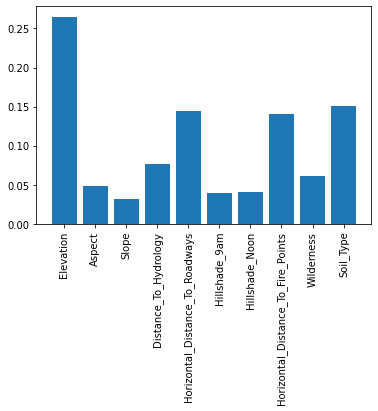

In [84]:
pyplot.xticks(rotation='vertical')
pyplot.bar(train.columns, extraTreesClassifier_feature_importances[index], )

Elevation -> Soil_Type -> Horizontal_Distance_To_Roadways -> Horizontal_Distance_To_Fire_Points -> Distance_To_Hydrology -> Wilderness -> Aspect -> Hillshade_Noon -> Hillshade_9am -> Slope

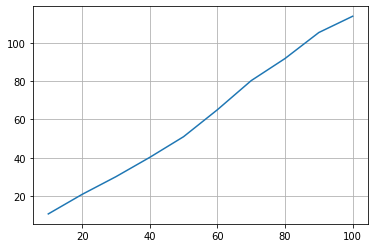

In [78]:
pyplot.grid(True)
pyplot.plot(extraTreesClassifier_estimators, extraTreesClassifier_train_time)
pyplot.show()

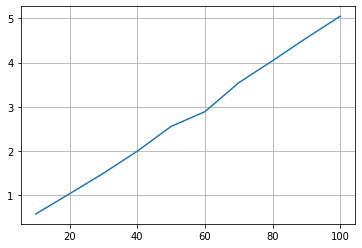

In [79]:
pyplot.grid(True)
pyplot.plot(extraTreesClassifier_estimators, extraTreesClassifier_predict_time)
pyplot.show()

Добавим результат в итоговую таблицу:

In [ ]:
models_results.append(['ExtraTreesClassifier', best_accuracy, extraTreesClassifier_train_time[index], extraTreesClassifier_predict_time[index], "estimators num: {}".format(extraTreesClassifier_estimators[index])])

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn_neighbors = []
knn_accuracy = []
knn_train_time = []
knn_predict_time = []
neighbors = 5
for neighbors in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    
    start_time = time.time()
    knn.fit(x_train, y_train)
    knn_train_time.append(time.time() - start_time)

    start_time = time.time()
    knn_predict_result = knn.predict(x_test)
    knn_predict_time.append(time.time() - start_time)

    accuracy = accuracy_score(y_test, knn_predict_result)

    knn_neighbors.append(neighbors)
    knn_accuracy.append(accuracy)

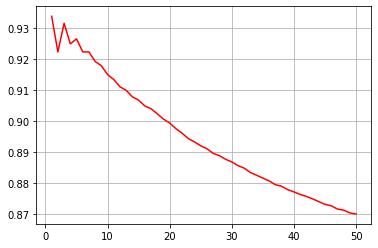

In [26]:
pyplot.grid(True)
pyplot.plot(knn_neighbors, knn_accuracy, color="#FF0000")
pyplot.xlabel('neighbors')
pyplot.ylabel('accuracy')
pyplot.show()

In [ ]:
best_accuracy = max(knn_accuracy)
index = knn_accuracy.index(best_accuracy)
print('Best accuracy: ', best_accuracy)
print('Neighbors num: ', knn_neighbors[index])
print('Train time: ', knn_train_time[index])
print('Predict time: ', knn_predict_time[index])

Добавим результат в итоговую таблицу:

In [ ]:
models_results.append(['KNeighborsClassifier', best_accuracy, knn_train_time[index], knn_predict_time[index], "Neighbors num: {}".format(knn_neighbors[index])])

In [27]:
import xgboost

xgboost_model = xgboost.XGBClassifier()

start_time = time.time()
xgboost_model.fit(x_train, y_train)
xgboost_train_time = time.time() - start_time
print("XGBClassifier train time = {} seconds".format(xgboost_train_time))

start_time = time.time()
xgboost_result = xgboost_model.predict(x_test)
xgboost_predict_time = time.time() - start_time
print("XGBoost predict time = {} seconds".format(xgboost_predict_time))

xgboost_model_accuracy = accuracy_score(y_test, xgboost_result)
print("XGBoost accuracy: ", xgboost_model_accuracy)

XGBClassifier train time = 63.58207178115845 seconds


Добавим результат в итоговую таблицу:

In [ ]:
models_results.append(['XGBClassifier', xgboost_model_accuracy, xgboost_train_time[index], xgboost_predict_time[index], "???"])

In [29]:
from sklearn.ensemble import RandomForestClassifier

randomForestClassifier_estimators = []
randomForestClassifier_accuracy = []
randomForestClassifier_train_time = []
randomForestClassifier_predict_time = []
randomForestClassifier_feature_importances = []
for estimators in range(10, 301, 10):
    randomForestClassifier = RandomForestClassifier(n_estimators = estimators, max_features=10)
    
    start_time = time.time()
    randomForestClassifier.fit(x_train, y_train)
    randomForestClassifier_train_time.append(time.time() - start_time)

    start_time = time.time()
    randomForest_result = randomForestClassifier.predict(x_test)
    randomForestClassifier_predict_time.append(time.time() - start_time)

    accuracy = accuracy_score(y_test, randomForest_result)
    
    randomForestClassifier_estimators.append(estimators)
    randomForestClassifier_accuracy.append(accuracy)
    randomForestClassifier_feature_importances.append(randomForestClassifier.feature_importances_)

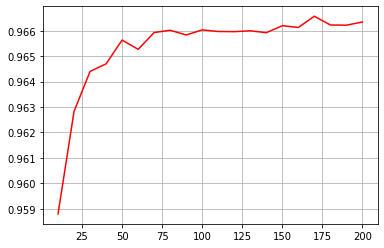

In [30]:
pyplot.grid(True)
pyplot.plot(randomForestClassifier_estimators, randomForestClassifier_accuracy, color="#FF0000")
pyplot.xlabel('estimators')
pyplot.ylabel('accuracy')
pyplot.show()

In [31]:
best_accuracy = max(randomForestClassifier_accuracy)
index = randomForestClassifier_accuracy.index(best_accuracy)
print('Best accuracy: ', best_accuracy)
print('Estimatos num: ', randomForestClassifier_estimators[index])
print('Train time: ', randomForestClassifier_train_time[index])
print('Predict time: ', randomForestClassifier_predict_time[index])

Best accuracy:  0.9665686767226839


In [ ]:
for i, value in enumerate(randomForestClassifier_feature_importances[index]):
    print(train.columns[i], ' -> ', value)

In [ ]:
pyplot.xticks(rotation='vertical')
pyplot.bar(train.columns, randomForestClassifier_feature_importances[index], )

Elevation -> Soil_Type -> Horizontal_Distance_To_Roadways -> Horizontal_Distance_To_Fire_Points -> Distance_To_Hydrology -> Wilderness -> Aspect -> Hillshade_Noon -> Hillshade_9am -> Slope

In [ ]:
pyplot.grid(True)
pyplot.plot(randomForestClassifier_estimators, randomForestClassifier_train_time)
pyplot.show()

In [ ]:
pyplot.grid(True)
pyplot.plot(randomForestClassifier_estimators, randomForestClassifier_predict_time)
pyplot.show()

Добавим результат в итоговую таблицу:

In [ ]:
models_results.append(['RandomForestClassifier', best_accuracy, randomForestClassifier_train_time[index], randomForestClassifier_predict_time[index], "estimators num: {}".format(randomForestClassifier_estimators[index])])

Выводим итоговою таблицу:

In [86]:
print(models_results)

{}
